In [ ]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'
resultados_exames = pd.read_csv(uri)
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [ ]:
resultados_exames.isnull().sum() #verificando se existem dados nulos ou faltantes

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

x = resultados_exames.drop(columns=['id', 'diagnostico'])
y = resultados_exames['diagnostico']
x1 = x.drop(columns='exame_33')
treino_x, teste_x, treino_y, teste_y = train_test_split(x1, y, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y) #classificador se ajuste aos nossos dados de treinamento
print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)* 100)) #metodo utilizado para retornar uma acurácia, que será utilizada para medirmos os resultados

Resultado da classificação 92.40%


In [ ]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_Dummy = DummyClassifier(strategy = 'most_frequent')
classificador_Dummy.fit(treino_x, treino_y)
print("Resultado da classificação Dummy %.2f%%" % (classificador_Dummy.score(teste_x, teste_y)* 100))

Resultado da classificação Dummy 66.67%


In [ ]:
dados_plot = pd.concat([y, x1.iloc[:,0:10]], axis=1) # concatenar os valores dos exames e o diagnostico

In [ ]:
# Funçao melt() pega um dataframe e transforma ele em uma tabela contendo as variáveis, 
# os valores dessas variáveis e as classes pertencentes a elas

dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores" )

dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

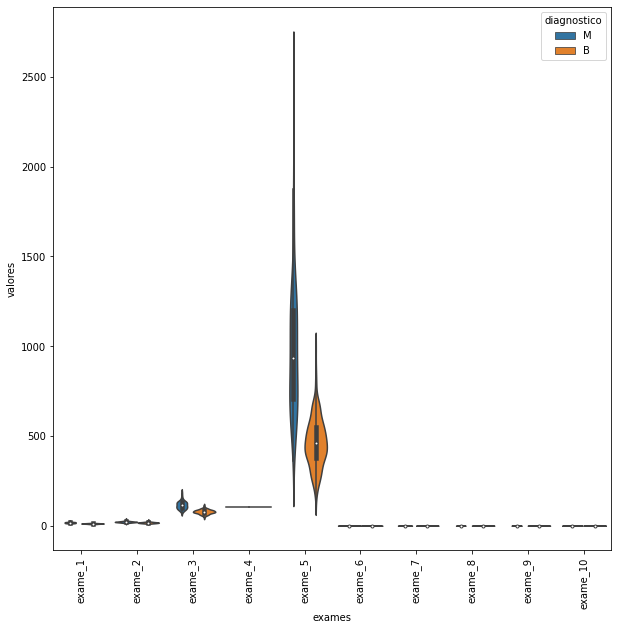

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.violinplot(data = dados_plot, x ='exames', y='valores', hue='diagnostico')
plt.xticks(rotation = 90)

# Fator que esta atrapalhando a nossa visualização é que temos valores de 0 a 2500. 
# Precisamos estabelecer algum tipo de limite ou padrão que nos permita trabalhar com esses dados de maneira mais eficiente

In [ ]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(x1)
x2 = padronizador.transform(x1) # transforma em um array numpy, estamos trabalhando com dataframe, precisamos altera-lo
x2 = pd.DataFrame(data=x2, columns=x1.keys())

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

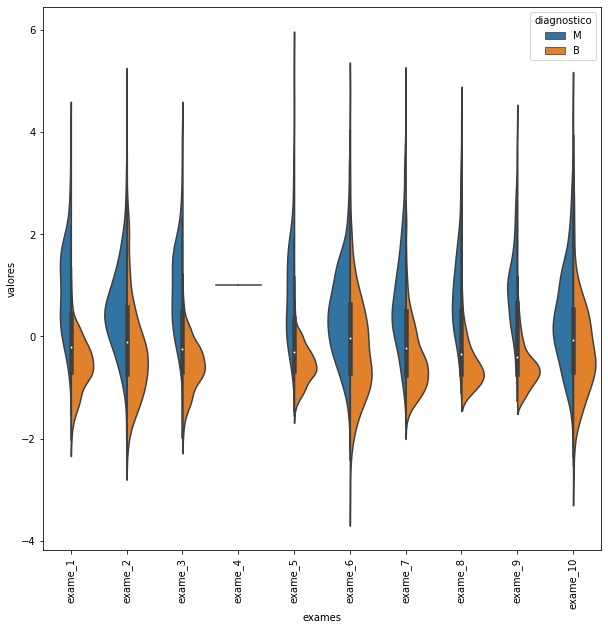

In [ ]:
dados_plot = pd.concat([y, x2.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores" )

plt.figure(figsize=(10,10))
sns.violinplot(data = dados_plot, x ='exames', y='valores', hue='diagnostico', split=True)
plt.xticks(rotation = 90)

In [ ]:
def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([y, valores.iloc[:,inicio:fim]], axis=1)
  dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores" )

  plt.figure(figsize=(10,10))
  sns.violinplot(data = dados_plot, x ='exames', y='valores', hue='diagnostico', split=True)
  plt.xticks(rotation = 90)

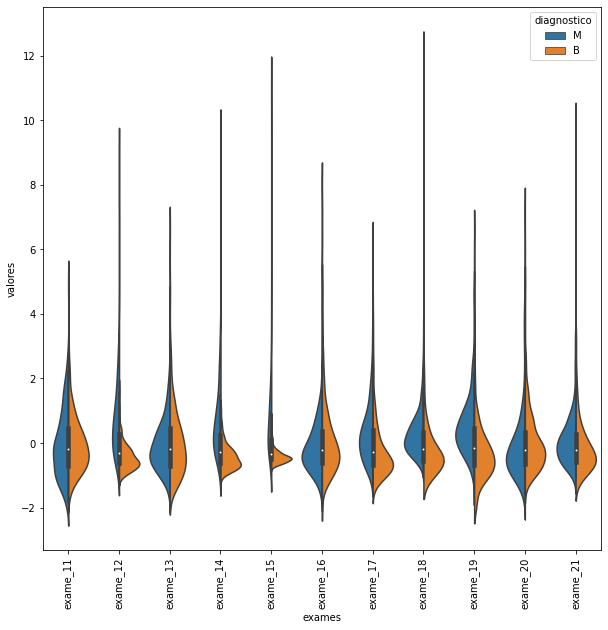

In [ ]:
grafico_violino(x2, 10, 21)

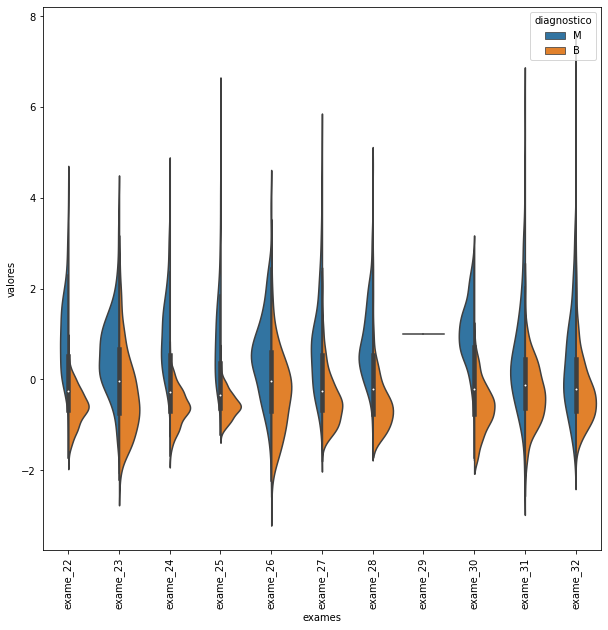

In [ ]:
grafico_violino(x2, 21, 32)

In [ ]:
# através dos graficos de violinos podemos verificar que os exames 4 e 29
# apresentam valores constantes porém não acho que faria sentido em manter as colunas, 
# visto que elas não eram representativas para a classificação, logo não alteram o resultado

x3 = x2.drop(columns=['exame_4', 'exame_29'])

In [ ]:
def classificar(valores):

  SEED = 123143
  random.seed(SEED)
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores, y, test_size = 0.3)

  classificador = RandomForestClassifier(n_estimators = 100)
  classificador.fit(treino_x, treino_y) #classificador se ajuste aos nossos dados de treinamento
  print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)* 100))

In [ ]:
classificar(x3)
# podemos ver que a remoção da coluna feita não teve um impacto negativo tão grande, 
# já que não era tão significativa para a classificação nesse caso, já que possuia valores constantes.

Resultado da classificação 91.81%


In [ ]:
# matriz de correlação (a correlação entre todas as variáveis)
matriz_correlacao = x3.corr()
matriz_correlacao

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


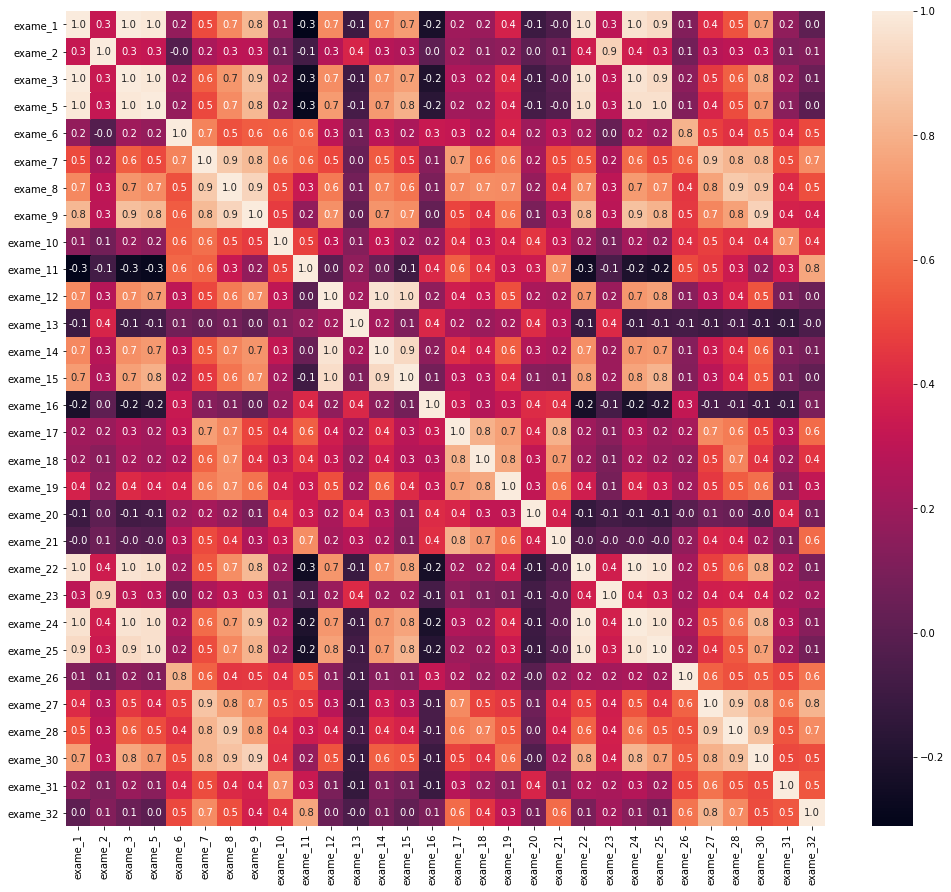

In [ ]:
matriz_correlacao = x3.corr()
plt.figure(figsize = (17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

In [ ]:
# Criaremos então uma matriz_correlacao_v1 que armazenará o retorno de todos as correlações superiores a 0.99
# possuem uma correlação quase perfeita.
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#podemos fazer uma soma desses valores e criar uma nova variávei 
#variaveis_correlacionadas que armazenará os retornos maiores do que 1.0.
#quanto mais alta a correlação entre as variáveis tem-se informação duplicada, 
#o que pode contribuir mais com viés no modelo de classificação
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [ ]:
x4 = x3.drop(columns=variaveis_correlacionadas.keys())
x4

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [ ]:
#Medindo a acurácia da nova versão do conjunto de dados, verificamos uma pequena queda
#Fazendo outra análise, podemos verificar que os exames_1 e exame_3 estão correlacionados entre si
#na mesma proporção que os exames_22 e exame_24, portanto sendo mais indicado excluir apenas 
#uma variavel de cada par.
classificar(x4)

Resultado da classificação 93.57%


In [ ]:
#excluindo as features exame_3 e exame_24 e criando uma nova versão do conjunto de dados
#e medindo a sua acurácia.
x5 = x3.drop(columns=['exame_3', 'exame_24'])
classificar(x5)

Resultado da classificação 92.98%


In [ ]:
#A função qui-quadrado não aceita valores negativos, e existem vários deles, por exemplo, na coluna "exame_5". 
#Uma alternativa para corrigirmos isso seria voltarmos para os valores não-normalizados que tínhamos no conjunto x1. 
#Sendo assim, teremos que remover deste conjunto todas as colunas que não estão presentes em x5.

x6 = x1.drop(columns=['exame_4', 'exame_29', 'exame_3', 'exame_24'])

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#SelectKbest -> a partir de uma função matemática, 
#ele gera um score para cada feature e seleciona um determinado número de features dentre os melhores scores

#Chi2 -> Uma função matemática muito utilizada é o Qui-quadrado, 
#que usaremos para inferir quais features serão mais representativas para nosso processo de classificação

selecionar_kmelhores = SelectKBest(chi2, k = 5)

SEED = 123143
random.seed(SEED)


treino_x, teste_x, treino_y, teste_y = train_test_split(x6, y, test_size = 0.3)


selecionar_kmelhores.fit(treino_x, treino_y)
#print("Exames selecionados:", list(x6.columns[selecionar_kmelhores.get_support()]))
#print("Exames removidos:", list(x6.columns[~selecionar_kmelhores.get_support()]))
treino_kbest = selecionar_kmelhores.transform(treino_x) # -> Vai te devolver os dados somente com as colunas que o SelectKBest selecionou
teste_kbest = selecionar_kmelhores.transform(teste_x) # -> Vai te devolver os dados somente com as colunas que o SelectKBest selecionou
classificador = RandomForestClassifier(n_estimators=100, random_state=123143)
classificador.fit(treino_kbest, treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_kbest, teste_y)* 100))

Resultado da classificação 96.49%


[Text(69.0, 0.5, 'Real'), Text(0.5, 51.0, 'Predição')]

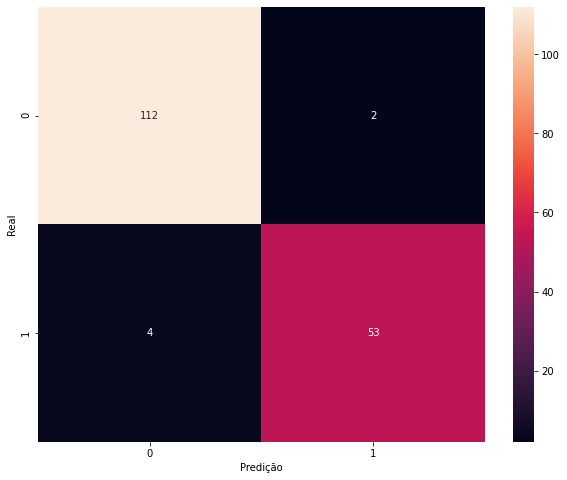

In [ ]:
from sklearn.metrics import confusion_matrix

#Essa função nos retorna uma matriz na qual os elementos i são os valores reais 
#e os elementos j são os valores de predição.

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
plt.figure(figsize = (10, 8))
#sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

Resultado da classificação 91.81%


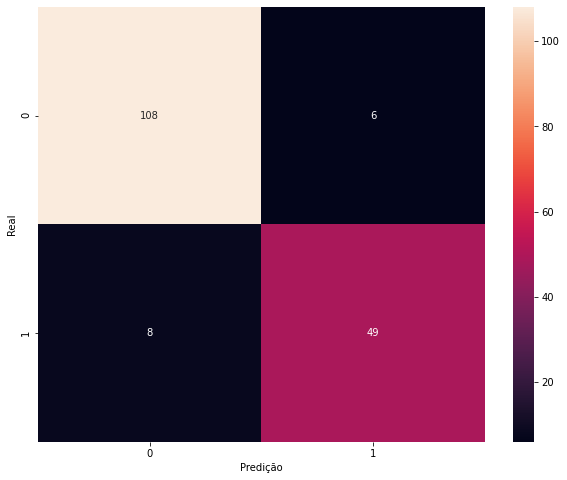

In [ ]:
from sklearn.feature_selection import RFE

SEED = 123143
random.seed(SEED)

#Teremos que recriá-lo, treinando-o com os dados treino_x e treino_y.
treino_x, teste_x, treino_y, teste_y = train_test_split(x6, y, test_size = 0.3)
classificador = RandomForestClassifier(n_estimators=100, random_state=123143)
classificador.fit(treino_x, treino_y)

#Esse método tem como entrada o estimador (estimator),
#o número de features que queremos selecionar (n_features_to_select), 
#o número de passos que ele dará (step)
selecionador_RFE = RFE(estimator = classificador, n_features_to_select = 2, step = 1)
selecionador_RFE.fit(treino_x, treino_y)

treino_RFE = selecionador_RFE.transform(treino_x)#transformaremos os dados de treino_x e os armazenaremos em uma variável treino_rfe; 
teste_RFE = selecionador_RFE.transform(teste_x) #transformaremos os dados de teste_x e os armazenaremos em uma variável teste_rfe; 
classificador.fit(treino_RFE, treino_y)#e então ajustaremos o classificador com os dados treino_rfe e treino_y.

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_RFE))
plt.figure(figsize=(10,8))
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel = "Predição", ylabel= "Real")
#sns.set(font_scale= 2)

print("Resultado da classificação %.2f%%" % (classificador.score(teste_RFE, teste_y)* 100))

#Interpretação da matriz de confusão
#De 114 casos benignos, nosso modelo acertou 110, classificando o restante (4) como maligno. 
#Já nos casos de cânceres malignos, nosso modelo acertou 49, classificando 8 como benignos.

Resultado da classificação 93.57%


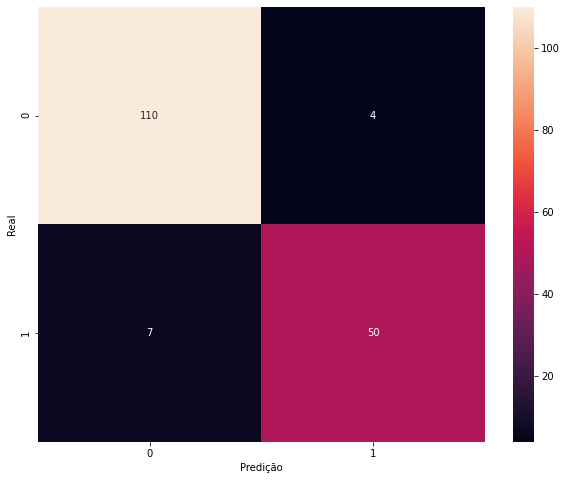

In [ ]:
#RFE -> O RFECV divide o nosso banco de dados em blocos e aplica o algoritmo RFE, 
#que acabamos de aprender, em cada um desses blocos, gerando diferentes resultados. 
#Dessa forma, O RFECV não só nos informa quantas features precisamos ter para gerar o melhor resultado possível, 
#como também quais features são essas.

from sklearn.feature_selection import RFECV

SEED = 123143
random.seed(SEED)

#Teremos que recriá-lo, treinando-o com os dados treino_x e treino_y.
treino_x, teste_x, treino_y, teste_y = train_test_split(x6, y, test_size = 0.3)
classificador = RandomForestClassifier(n_estimators=100, random_state=123143)
classificador.fit(treino_x, treino_y)

#Esse método tem como entrada o estimador (estimator),
#o número de features que queremos selecionar (n_features_to_select), 
#o número de passos que ele dará (step)
selecionador_RFECV = RFECV(estimator = classificador, cv = 5, scoring = "accuracy", step = 1)
selecionador_RFECV.fit(treino_x, treino_y)

treino_RFECV = selecionador_RFECV.transform(treino_x)#transformaremos os dados de treino_x e os armazenaremos em uma variável treino_rfecv; 
teste_RFECV = selecionador_RFECV.transform(teste_x) #transformaremos os dados de teste_x e os armazenaremos em uma variável teste_rfecv; 
classificador.fit(treino_RFECV, treino_y)#e então ajustaremos o classificador com os dados treino_rfecv e treino_y.

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_RFECV))
plt.figure(figsize=(10,8))
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel = "Predição", ylabel= "Real")
#sns.set(font_scale= 2)

print("Resultado da classificação %.2f%%" % (classificador.score(teste_RFECV, teste_y)* 100))

In [ ]:
selecionador_RFECV.n_features_ # acesso ao número de features selecionadas para chegar ao resultado

21

In [ ]:
treino_x.columns[selecionador_RFECV.support_] # retorno todas as features selecionadas

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_12', 'exame_14', 'exame_15', 'exame_18', 'exame_21',
       'exame_22', 'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28',
       'exame_30', 'exame_31', 'exame_32'],
      dtype='object')

In [ ]:
selecionador_RFECV.grid_scores_ #score acumulativo para cada uma das features

array([0.87686709, 0.94727848, 0.95474684, 0.94974684, 0.95724684,
       0.95224684, 0.95718354, 0.94968354, 0.94968354, 0.95471519,
       0.95224684, 0.95471519, 0.95977848, 0.95474684, 0.95468354,
       0.9496519 , 0.94971519, 0.95724684, 0.95974684, 0.95474684,
       0.96734177, 0.95727848, 0.96227848, 0.95974684, 0.95977848,
       0.96734177, 0.95724684, 0.96481013])

<function matplotlib.pyplot.show>

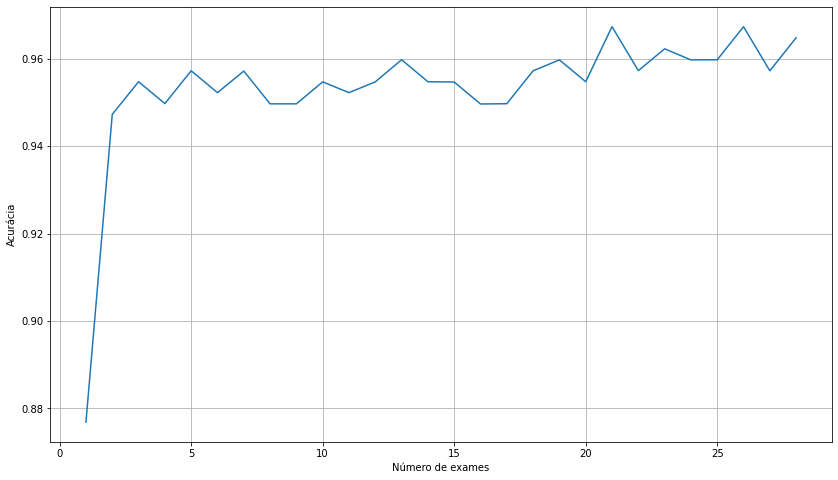

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_RFECV.grid_scores_) + 1), selecionador_RFECV.grid_scores_)
plt.grid(True)
plt.show

#Observamos no gráfico que 21 é o número de features que apresenta o maior score.

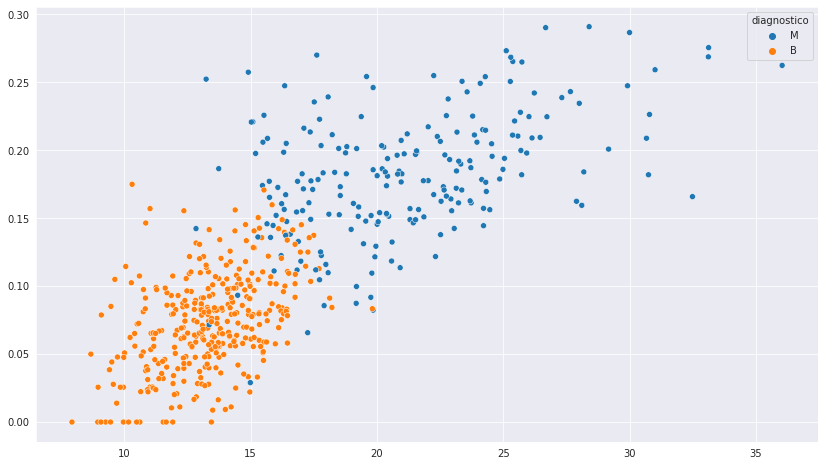

In [ ]:
#Queremos visualizar cada linha em um plano, de forma parecida com um gráfico de dispersão, 
#para compararmos entre tipos de cânceres malignos e benignos. 
#Para isso, podemos pegar um dos métodos de seleção de features RFE, 
#e modificamos o número de seleções para 2, resultando em duas dimensões de dados, 
#e plotar os resultados em um plano.

x7 = selecionador_RFE.transform(x6)

plt.figure(figsize=(14,8))
sns.set_style('darkgrid')
plt.grid(True)
sns.scatterplot(x= x7[:,0], y= x7[:,1], hue = y)

#Estamos selecionando apenas duas features, sendo que tinhamos 28, neste caso 
#estamos perdendo muita informação. Sendo assim, no caso de visualizações desse tipo, 
#selecionar apenas duas features não é o mais adequado.

In [ ]:
x7

array([[25.38  ,  0.2654],
       [24.99  ,  0.186 ],
       [23.57  ,  0.243 ],
       ...,
       [18.98  ,  0.1418],
       [25.74  ,  0.265 ],
       [ 9.456 ,  0.    ]])

# Técnicas para manter o máximo de informações possível em dimensionalidades reduzidas (PCA e TSNE)

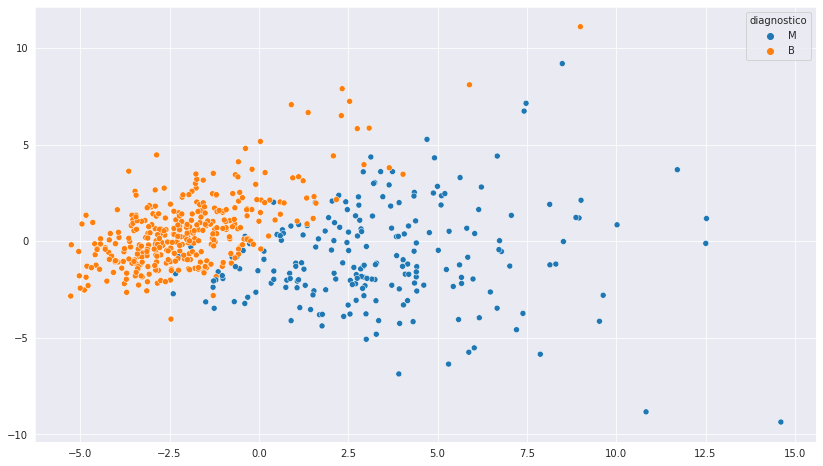

In [ ]:
#O PCA opera uma transformação matemática sobre os dados, 
#na qual as primeiras dimensões serão as variáveis que manterão o maior volume possível de informação.

#PCA se comporta melhor com os dados já normalizados, por isso utilizamos a base de dados x5

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x8 = pca.fit_transform(x5)

plt.figure(figsize=(14,8))
sns.set_style('darkgrid')
plt.grid(True)
sns.scatterplot(x= x8[:,0], y= x8[:,1], hue = y)

#Dessa forma, conseguiremos enxergar de maneira mais clara onde existem pontos com maiores confusões, 
#traçando uma linha que dividirá os cânceres dos tipos maligno ou benigno

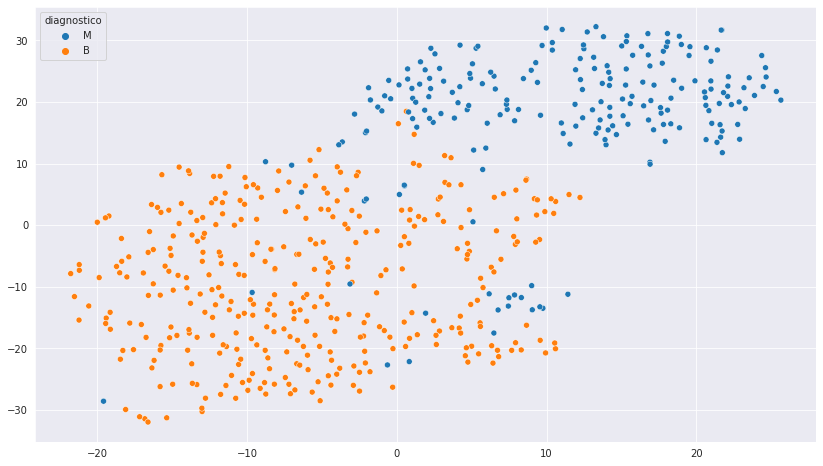

In [ ]:
#t-SNE tenta manter as distâncias entre os pontos
#t-SNE tenta manter a proporção dessas distâncias na redução para dimensões menores, 
#permitindo que tenhamos uma noção de quão distante um ponto está do outro.

from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
x9 = tsne.fit_transform(x5)

plt.figure(figsize=(14,8))
sns.set_style('darkgrid')
plt.grid(True)
sns.scatterplot(x= x9[:,0], y= x9[:,1], hue = y)

#teremos uma visualização que separa muito bem os dados no espaço, 
#tornando mais claro quais pontos estão próximos de um tipo de câncer maligno ou benigno. 
#Assim, é bem mais simples determinar uma fronteira entre tais classificações.